# Visualizzare dati geospaziali


**obiettivi**
- disegnare una mappa con matplotlib
- rappresentare punti
- mappe coropletiche

**dati**
- ISTAT
- [Inside Airbnb](http://insideairbnb.com/venice)

**requisiti**
- conoscenza di geopandas

**suggerimenti**<br/>
seguire l'hashtag Twitter [#30DayMapChallege](https://twitter.com/hashtag/30DayMapChallenge)

**status**<br/>
"la mappa non è il territorio"

In [32]:
library(sf)
library(ggplot2)
library(readr)
library(ggspatial)
#install.packages("ggspatial")
#install.packages("prettymapr")
#install.packages("plotly")
options(viewer = NULL)  # Disabilita l'uso di plotly come visualizzatore


# URL del dataset Airbnb
airbnb_venezia_url <- "http://data.insideairbnb.com/italy/veneto/venice/2023-12-12/data/listings.csv.gz"

# Leggere i dati CSV compressi
airbnb_venezia <- read_csv(airbnb_venezia_url,show_col_types = FALSE)


In [2]:
# Creare una geometria sf a partire da latitudine e longitudine
geo_airbnb_venezia <- st_as_sf(
  airbnb_venezia,
  coords = c("longitude", "latitude"),
  crs = 4326
)

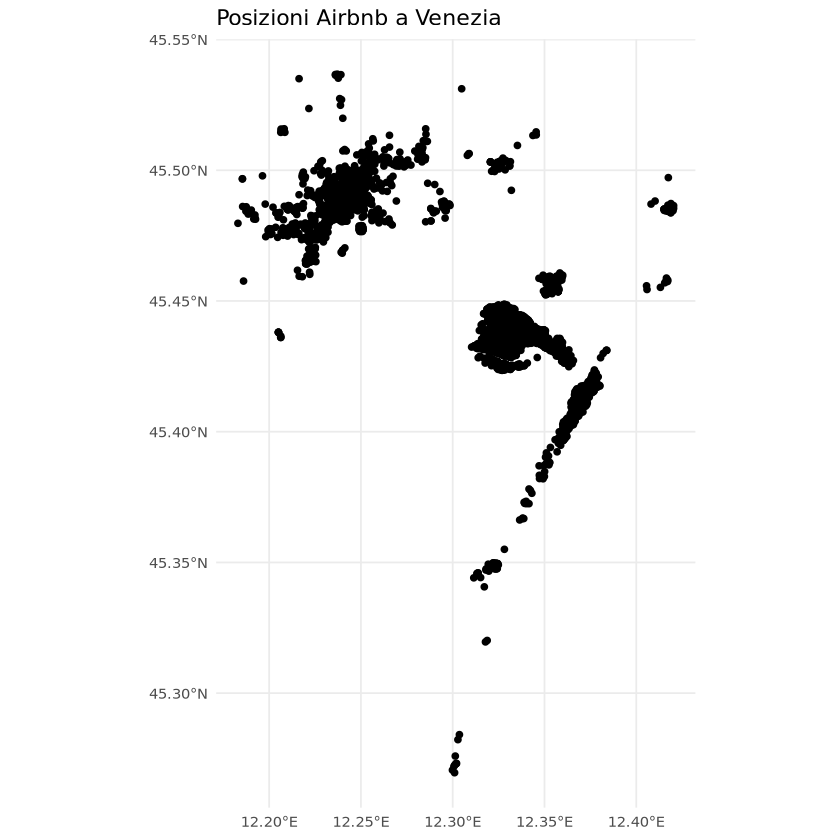

In [3]:
# Plot semplice
ggplot(geo_airbnb_venezia) +
  geom_sf() +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia")


scegliere i [colori](https://r-graph-gallery.com/ggplot2-color.html)

![](https://r-graph-gallery.com/img/graph/42-colors-names.png)

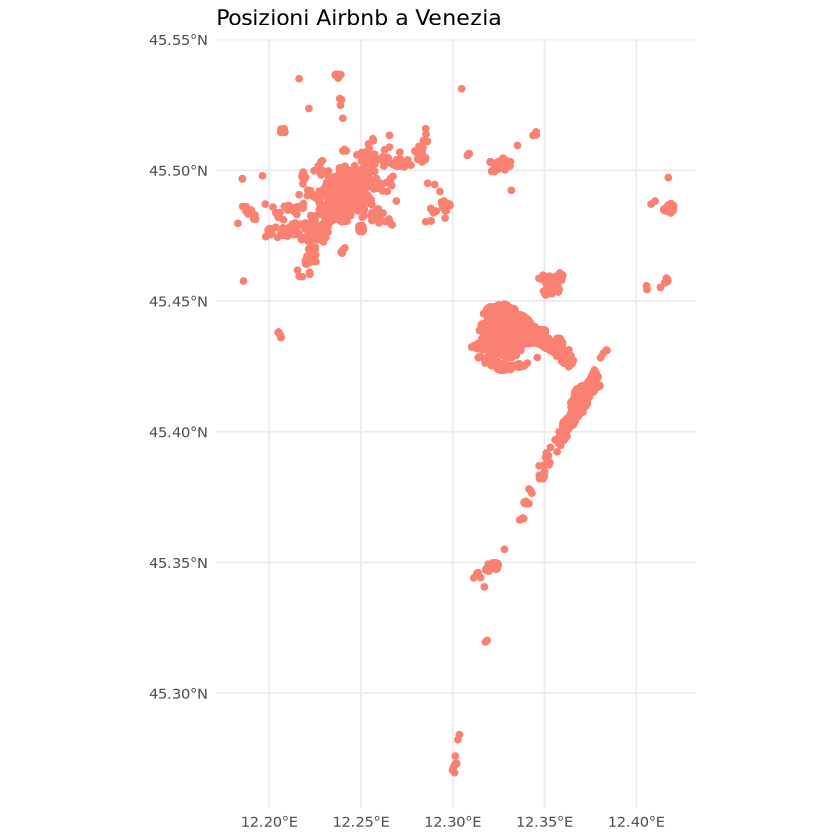

In [31]:

# Plot con colore personalizzato
ggplot(geo_airbnb_venezia) +
  geom_sf(color = "salmon") +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia")


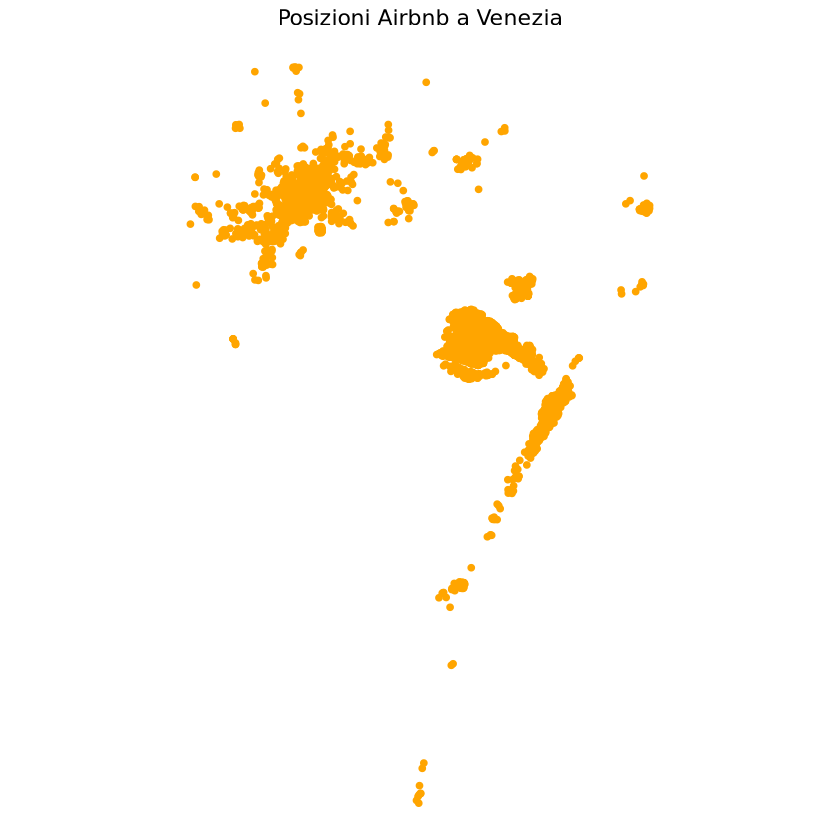

In [33]:
# Plot con colore e titolo personalizzati
ggplot(geo_airbnb_venezia) +
  geom_sf(color = "orange") +
  theme_void() + # Nasconde gli assi
  ggtitle("Posizioni Airbnb a Venezia") +
  theme(plot.title = element_text(hjust = 0.5))


# aggiungere mappe di sfondo

[Tile Map Service](https://wiki.osgeo.org/wiki/Tile_Map_Service_Specification)


<img src="https://opengeospatial.github.io/e-learning/images/pyramid2.png" width=500px />

Schema supportato

*http://{**s**}.**dominio.com**/{**z**}/{**x**}/{**y**}.png*

- **s** => sottodominio (se sono disponibili più di un server tms - solitamente a.dominio.com b.dominio.com ...)
- **dominio.com** => il dominio (es. openstreetmap.org)
- **z** => livello di zoom
- **x** =>  colonna
- **y** => riga

Es:<br/>
&nbsp;&nbsp;&nbsp;https://tile.openstreetmap.org/18/139191/93190.png

![](https://tile.openstreetmap.org/18/139191/93190.png)


Zoom: 10



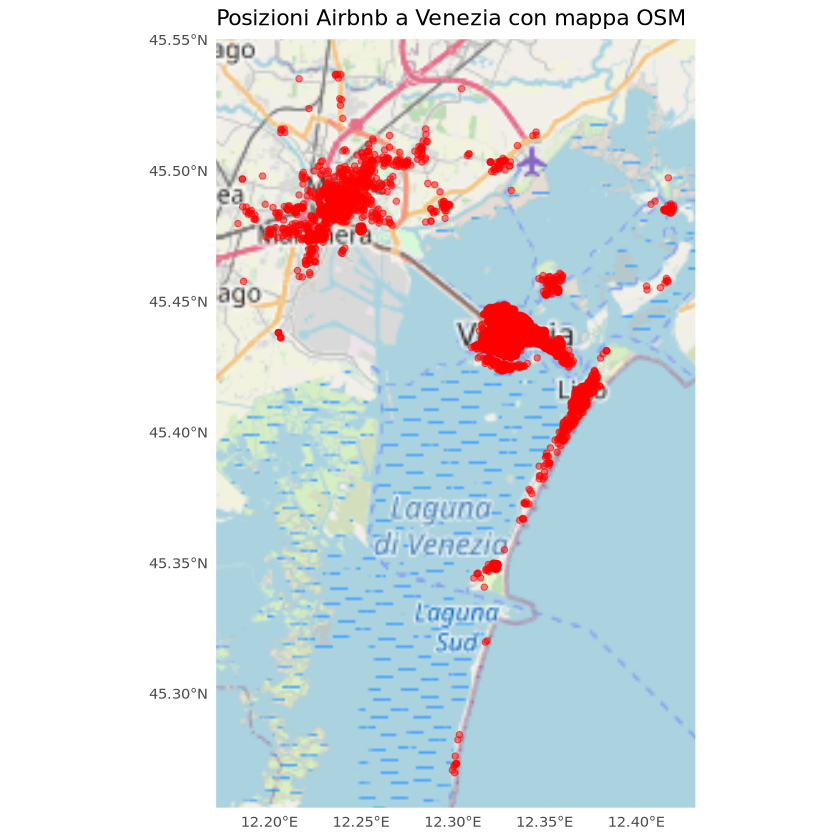

In [35]:
# Creare il plot con una mappa di base (OpenStreetMap)
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # URL corretto
  geom_sf(data = geo_airbnb_venezia, color = "red", alpha = 0.5) +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia con mappa OSM")


Zoom: 10



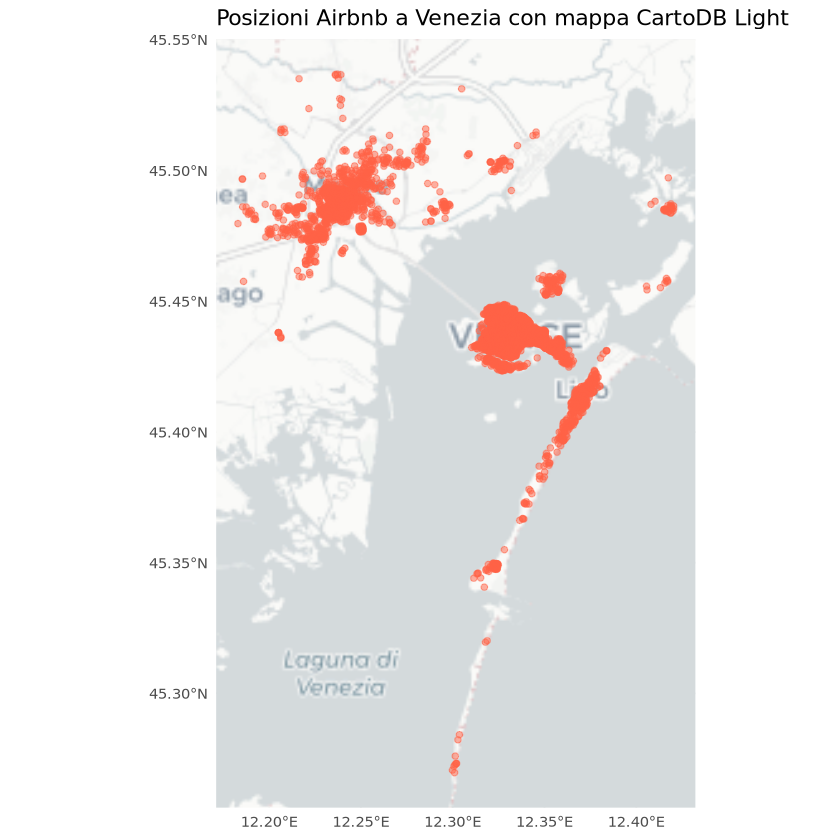

In [36]:
osm_light <- "https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/${z}/${x}/${y}.png"

ggplot() +
  annotation_map_tile(osm_light, zoom = 10) + # Rimuovi `${s}`
  geom_sf(data = geo_airbnb_venezia, color = "tomato", alpha = 0.5) +
  theme_minimal() +
  ggtitle("Posizioni Airbnb a Venezia con mappa CartoDB Light")


## WGS 84 / Pseudo-Mercator
*Spherical Mercator, Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI*

[EPSG:3857](http://epsg.io/3857)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Tissot_mercator.png/600px-Tissot_mercator.png)

Variazione con la latitudine delle distanze rappresentate (in gradi o pixel) sulla proiezione di Mercatore rispetto alle distanze effettive (in metri) sulla superficie terrestre.

https://wiki.openstreetmap.org/wiki/Zoom_levels


|  Livello |	# Tile |	Dimensione Tile <br/>(°of longitude) |	m / pixel<br/>(sull'Equatore) |	~ Scala<br/>(sullo schermo) | 	Esempio di<br/>areae da representare 	|
|-  |-	|- |- |- |- |   
|0 	|1 	|360 	|156 |412 	|1:500 milioni |	mondo intero|
|1 	|4 	|180 	|78.206 |1:250 milioni| |
|2 	|16 |90 	|39.103 |1:150 milioni | area subcontinentale|
|3 	|64 |45 	|19.551 |1:70 milioni |paesi più grandi|
|4 	|256 |22.5 	|9.776 |1:35 milion | |
|5 	|1.024 |11.25 	|4.888 	|1:15 milion |grande paese africano|
|6 	|4.096 	|5.625 	|2.444 	|1:10 milioni |grande paese europeo
|
|7 	|16.384 |2.813 	|1.222 	|1:4 milioni 	|piccolo paese, stato USA|
|8 	|65.536 |1.406 	|610.984 	|1:2 milioni| |
|9 	|262.144 |0.703 	|305.492 	|1:1 milioni |vasta area, larga area metropolitana|
|10 | 1.048.576 |0.352 	|152.746 	|1:500 mila |area metropolitana|
|11	| 4.194.304 |0.176 	|76.373 	|1:250 mila |città|
|12 | 16.777.216 |0.088 	|38.187 	|1:150 mila |città o quartiere cittadino|
|13 | 67.108.864 	|0.044 	|19.093 	|1:70 mila |villaggio, o sobborgo|
|14 | 268.435.456 	|0.022 	|9.547 	|1:35 mila 	| |
|15 | 1.073.741.824 	|0.011 	|4.773 	|1:15 mila |quartiere|strade|
|16 | 4.294.967.296 	|0.005 	|2.387 	|1:8 mila 	|sttrade|
|17 |17.179.869.184 	|0.003 	|1.193 	|1:4 mila 	|blocco, parco, indirizzi|
|18 |68.719.476.736 	|0.001 	|0.596 	|1:2 mila | alcuni edifici, alberi|
|19 |274.877.906.944 	|0.0005 	|0.298 	|1:1 mila|	dettagli sulle strade locali e sugli incroci|
|20 |1.099.511.627.776 	|0.00025 	|0.149 	|1:5 cento |un edificio di medie dimensioni |

In [40]:
ggsave("venezia_airbnb.pdf", width = 10, height = 7, dpi = 300)


Zoom: 10



# visualizzazione a punti

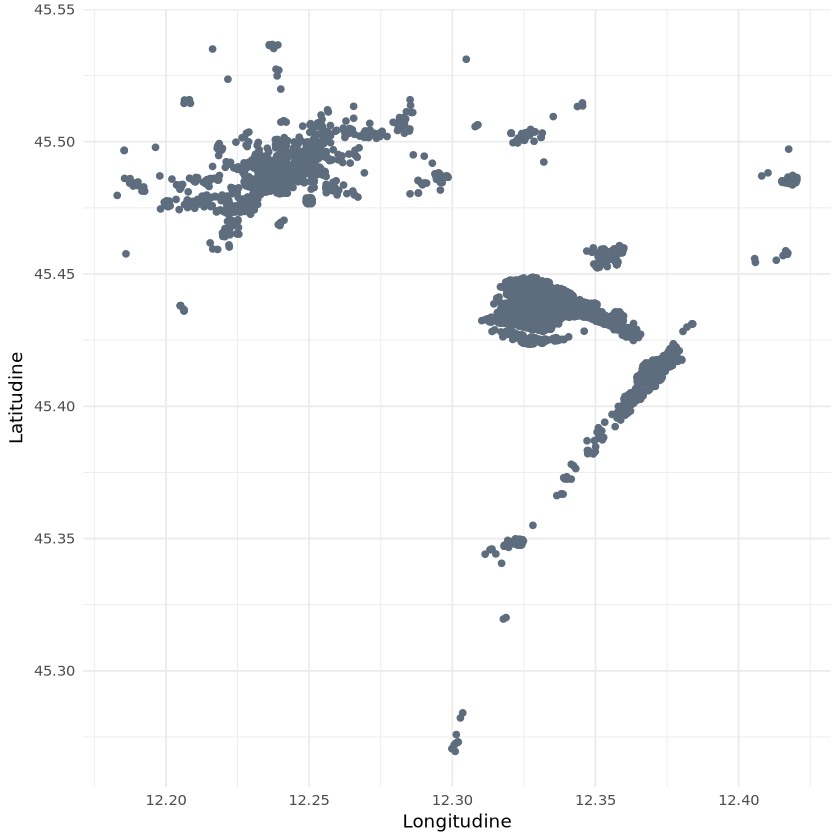

In [41]:
# Supponiamo che geo_airbnb_venezia sia un oggetto sf (Simple Features)
# Converti le coordinate in EPSG:4326 (WGS84)
geo_airbnb_venezia <- st_transform(geo_airbnb_venezia, 4326)

# Estrai le coordinate longitudine (lng) e latitudine (lat)
geo_airbnb_venezia$lng <- st_coordinates(geo_airbnb_venezia)[, 1]
geo_airbnb_venezia$lat <- st_coordinates(geo_airbnb_venezia)[, 2]

# Crea un joint plot con ggplot2
ggplot(geo_airbnb_venezia, aes(x = lng, y = lat)) +
  geom_point(color = "#5D6D7E") +  # Colore simile a "xkcd:dusky blue"
  theme_minimal() +
  labs(x = "Longitudine", y = "Latitudine")

In [ ]:
creare un grafico a dispersione (scatterplot) per conoscere le distribuzioni spaziali


In [43]:
install.packages("ggExtra")

also installing the dependencies ‘colourpicker’, ‘shinyjs’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



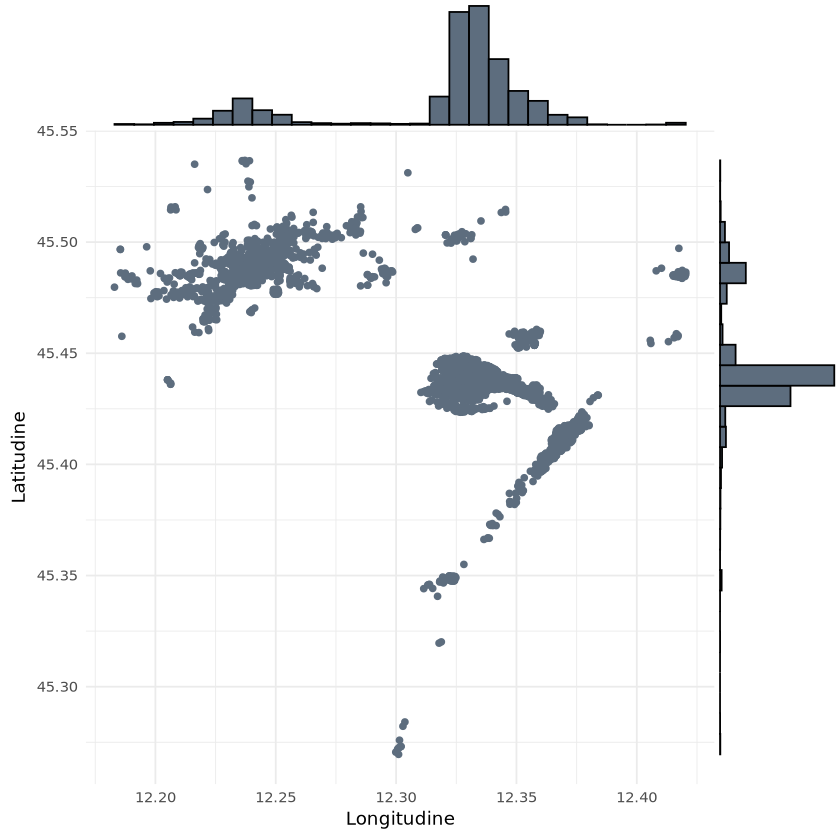

In [44]:
# Aggiungi ggExtra per i grafici marginali
library(ggExtra)

# Crea il grafico base
p <- ggplot(geo_airbnb_venezia, aes(x = lng, y = lat)) +
  geom_point(color = "#5D6D7E") +
  theme_minimal() +
  labs(x = "Longitudine", y = "Latitudine")

# Aggiungi le distribuzioni marginali
ggMarginal(p, type = "histogram", fill = "#5D6D7E")

In [ ]:
# Converti le coordinate in EPSG:3857 (Web Mercator)
geo_airbnb_venezia_3857 <- st_transform(geo_airbnb_venezia, 3857)

# Estrai le coordinate x e y
geo_airbnb_venezia_3857$x <- st_coordinates(geo_airbnb_venezia)[, 1]
geo_airbnb_venezia_3857$y <- st_coordinates(geo_airbnb_venezia)[, 2]

# Calcola il bounding box
bounding_box <- st_bbox(geo_airbnb_venezia)

# Crea la mappa di sfondo con ggspatial
osm_map <- ggplot() +
  annotation_map_tile(
    type = "osm",  # Usa il provider CartoDB Voyager
    zoom = 15,                 # Livello di zoom
    cachedir = tempdir()       # Directory per la cache dei tile
  ) +
  # Aggiungi i punti
  geom_point(data = geo_airbnb_venezia, aes(x = x, y = y), size = 0.75, color = "blue") +
  # Imposta i limiti degli assi basati sul bounding box
  coord_sf(
    xlim = c(bounding_box["xmin"], bounding_box["xmax"]),
    ylim = c(bounding_box["ymin"], bounding_box["ymax"])
  ) +
  # Personalizza il tema
  theme_minimal() +
  labs(x = "Longitudine (EPSG:3857)", y = "Latitudine (EPSG:3857)")

# Visualizza la mappa
print(osm_map)

Zoom: 15

Fetching 975 missing tiles



  |======================================================================| 100%


...complete!



In [ ]:
# Trasforma le coordinate in EPSG:3857 (Web Mercator)
geo_airbnb_venezia_3857 <- st_transform(geo_airbnb_venezia, crs = 3857)

# Estrai le coordinate x e y dai punti
geo_airbnb_venezia_3857 <- geo_airbnb_venezia_3857 %>%
  mutate(
    x = st_coordinates(geometry)[, 1],
    y = st_coordinates(geometry)[, 2]
  )

# Calcola il bounding box
bounding_box <- st_bbox(geo_airbnb_venezia_3857)
data_extent <- c(bounding_box["xmin"], bounding_box["xmax"], bounding_box["ymin"], bounding_box["ymax"])

# Creare il grafico con ggplot2
ggplot() +
  annotation_map_tile("https://a.basemaps.cartocdn.com/rastertiles/voyager/${z}/${x}/${y}.png", zoom = 15) + # Mappa di base
  geom_point(data = geo_airbnb_venezia_3857, aes(x = x, y = y), size = 0.75, alpha = 0.8) + # Punti
  coord_sf(xlim = c(data_extent[1], data_extent[2]), ylim = c(data_extent[3], data_extent[4]), expand = FALSE) + # Limiti della mappa
  theme_void() +
  ggtitle("Mappa con punti Airbnb Venezia")


### visualizzazione con esagoni

Una buona alternativa per capire dov'è la concentrazione dei punti in alcune zone è quella di utilizzare una griglia esagonale utilizzando colori diversi

L'uso del raggruppamento esagonale (a volte chiamato hexbin) ha proprietà migliori rispetto alle griglie quadrate, come una maggiore flessibilità nella forma e una migliore connettività tra le celle.

In [39]:
install.packages('hexbin')
library(hexbin)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Zoom: 10



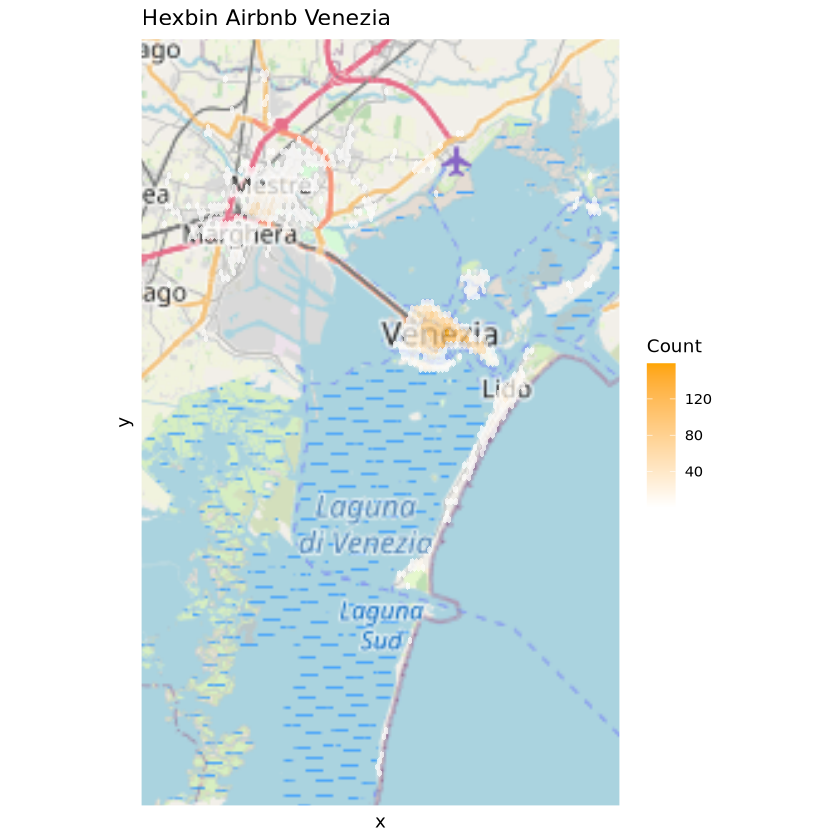

In [12]:
# Trasformare le coordinate in EPSG:3857
geo_airbnb_venezia_3857 <- st_transform(geo_airbnb_venezia, crs = 3857)

# Estrarre le coordinate x e y
geo_airbnb_venezia_3857$x <- st_coordinates(geo_airbnb_venezia_3857)[, 1]
geo_airbnb_venezia_3857$y <- st_coordinates(geo_airbnb_venezia_3857)[, 2]

# Calcolare il bounding box
bounding_box <- st_bbox(geo_airbnb_venezia_3857)

# Convertire il bounding box in un dataframe per ggplot2
bbox_df <- data.frame(
  xmin = bounding_box["xmin"],
  ymin = bounding_box["ymin"],
  xmax = bounding_box["xmax"],
  ymax = bounding_box["ymax"]
)

# Creare un hexbins plot
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # Aggiungi la mappa di base
  stat_binhex(data = geo_airbnb_venezia_3857,
              aes(x = x, y = y, fill = after_stat(count)), 
              bins = 100, alpha = 0.7, color = NA) + # Hexbin
  scale_fill_gradient(low = "white", high = "orange", name = "Count") + # Gradazione di colore
  coord_sf(xlim = c(bounding_box["xmin"], bounding_box["xmax"]),
           ylim = c(bounding_box["ymin"], bounding_box["ymax"])) + # Limitare la vista
  theme_minimal() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank()) + # Rimuovere gli assi
  ggtitle("Hexbin Airbnb Venezia")


In [13]:
ggsave("venezia_airbnb_hexbin.png", width = 10, height = 7, dpi = 300)


Zoom: 10



## Rappresentazione a densità 

Zoom: 10



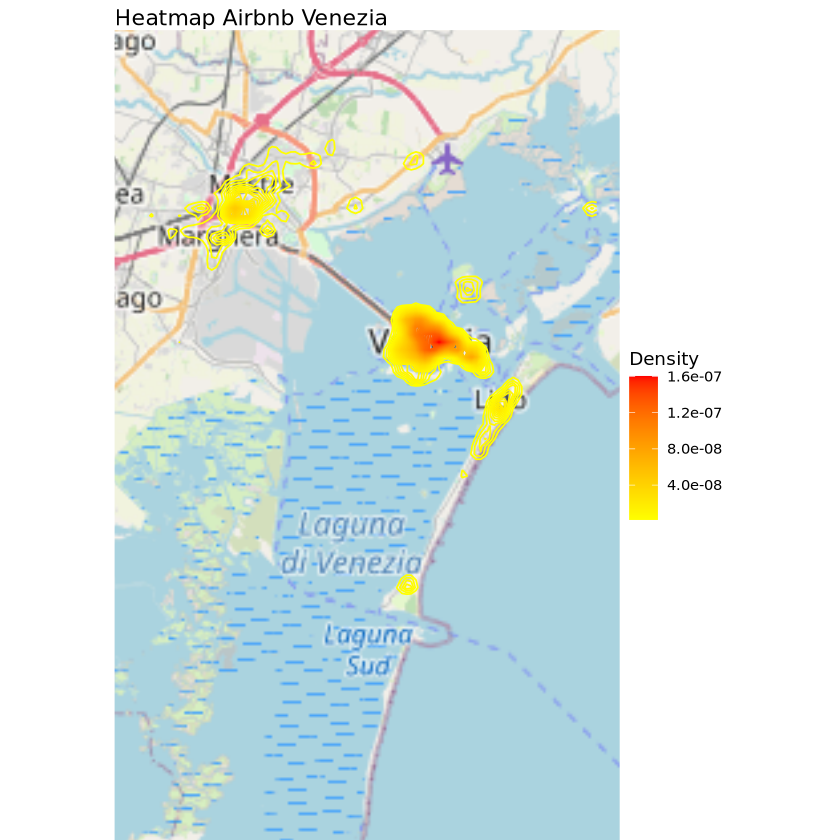

In [14]:
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # Mappa di base
  stat_density_2d(
    data = geo_airbnb_venezia_3857,
    aes(x = x, y = y, color = after_stat(level)), # Colorare i contorni
    geom = "contour", linewidth = 0.5, bins = 100 # Linee sottili con linewidth
  ) +
  scale_color_gradient(low = "yellow", high = "red", name = "Density") + # Gradiente colore per le linee
  coord_sf(
    xlim = c(bounding_box["xmin"], bounding_box["xmax"]),
    ylim = c(bounding_box["ymin"], bounding_box["ymax"])
  ) +
  theme_void() + # Rimuovere assi
  ggtitle("Heatmap Airbnb Venezia")


In [15]:
ggsave("venezia_airbnb_density.png", width = 10, height = 7, dpi = 300)


Zoom: 10



In [16]:
install.packages("dbscan")
library("dbscan")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram




In [17]:
# Parametri per DBSCAN
eps <- 150  # Distanza massima tra punti nel cluster
minp <- 5   # Numero minimo di punti in un cluster

# Trasformare le coordinate in EPSG:3857
geo_airbnb_venezia_3857 <- st_transform(geo_airbnb_venezia, crs = 3857)

# Estrarre le coordinate x e y
coords <- st_coordinates(geo_airbnb_venezia_3857)
x <- coords[, 1]
y <- coords[, 2]


In [18]:
# Applicare DBSCAN
db <- dbscan(cbind(x, y), eps = eps, minPts = minp)

# Aggiungere i cluster al dataframe
geo_airbnb_venezia_3857$cluster <- as.factor(db$cluster) # I cluster sono numerati, -1 è il rumore

# Separare i punti di rumore e i cluster
noise <- geo_airbnb_venezia_3857[geo_airbnb_venezia_3857$cluster == "-1", ]
clusters <- geo_airbnb_venezia_3857[geo_airbnb_venezia_3857$cluster != "-1", ]


In [19]:
head(clusters,3)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



id    listing_url                        scrape_id    last_scraped
1  6623 https://www.airbnb.com/rooms/6623  2.023121e+13 2023-12-12  
2  6624 https://www.airbnb.com/rooms/6624  2.023121e+13 2023-12-12  
3 12074 https://www.airbnb.com/rooms/12074 2.023121e+13 2023-12-12  
  source      name                                                         
1 city scrape Rental unit in Venice · ★4.94 · 2 bedrooms · 4 beds · 2 baths
2 city scrape Rental unit in Venice · ★4.98 · 2 bedrooms · 6 beds · 2 baths
3 city scrape Rental unit in Venice · ★4.94 · 2 bedrooms · 4 beds · 2 baths
  description
1 NA         
2 NA         
3 NA         
  neighborhood_overview                                                                                                                                                                                                                                                                              
1 Close by is the Frari Church (known as Tiziano’s church) and the area is beautifully quiet, with – for Venice – a rare feeling of space. <br />It’s very central here, yet quiet. The street leads to San Stae vaporetto stop so there’s no through traffic, and the Rialto is only 7 minutes away.
2 We are in the middle of a residential area called San Polo, just off Rialto bridge. Our neighborhood is far more "venetian" than San Marco with all its tourists jams.                                                                                                                             
3 There are plenty of bars, restaurants and pizzeria. You can enjoy lots of small shops, trendy cafés                                                                                                                                                                                                
  picture_url                                                     host_id
1 https://a0.muscache.com/pictures/492258/834683b6_original.jpg   15016  
2 https://a0.muscache.com/pictures/65440024/a5646008_original.jpg 15016  
3 https://a0.muscache.com/pictures/11646330/65e764d2_original.jpg 15016  
  geometry                ⋯ review_scores_value license instant_bookable
1 POINT (1372279 5690768) ⋯ 4.92                NA      FALSE           
2 POINT (1372275 5691022) ⋯ 4.93                NA      FALSE           
3 POINT (1372536 5690894) ⋯ 4.89                NA      FALSE           
  calculated_host_listings_count calculated_host_listings_count_entire_homes
1 3                              3                                          
2 3                              3                                          
3 3                              3                                          
  calculated_host_listings_count_private_rooms
1 0                                           
2 0                                           
3 0                                           
  calculated_host_listings_count_shared_rooms reviews_per_month
1 0                                           1.08             
2 0                                           0.59             
3 0                                           1.21             
  geometry                cluster
1 POINT (1372279 5690768) 1      
2 POINT (1372275 5691022) 1      
3 POINT (1372536 5690894) 1

Zoom: 10



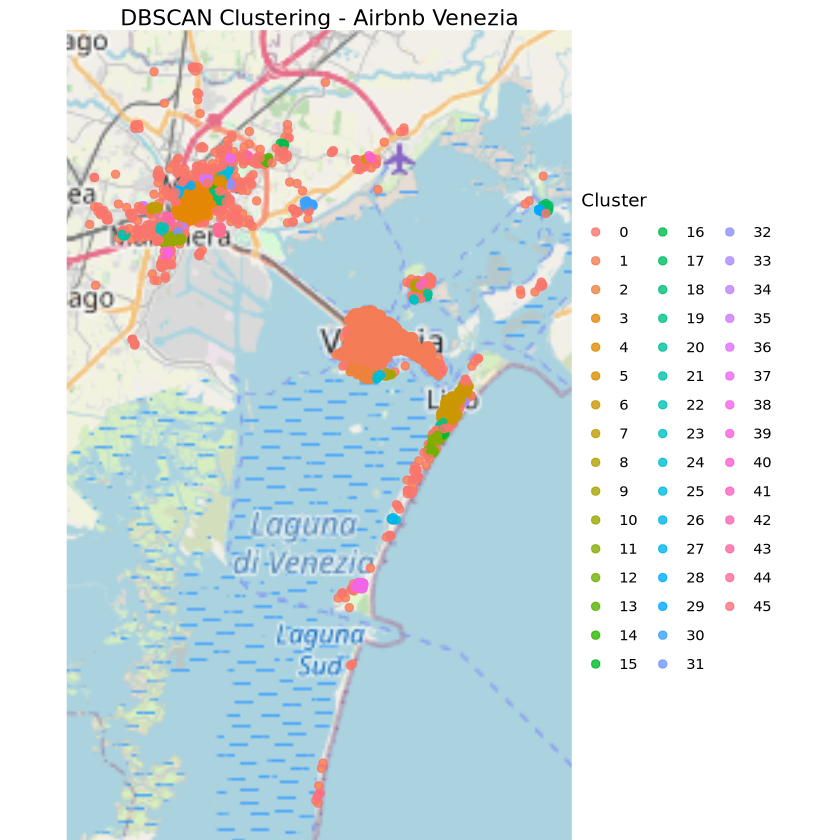

In [20]:
# Mappa di base con i punti
ggplot() +
  annotation_map_tile("https://tile.openstreetmap.org/${z}/${x}/${y}.png") + # Mappa di base
  geom_point(
    data = as.data.frame(noise),
    aes(x = x, y = y),
    color = "yellow",
    size = 1,
    alpha = 0.8
  ) + # Rumore
  geom_point(
    data = as.data.frame(clusters),
    aes(x = x, y = y, color = as.factor(cluster)), # Colori diversi per cluster
    size = 2, # Dimensione maggiore per i cluster
    alpha = 0.8
  ) +
  scale_color_manual(
    values = scales::hue_pal()(length(unique(clusters$cluster))),
    name = "Cluster"
  ) + # Mappatura dei colori per cluster
  theme_void() +
  ggtitle("DBSCAN Clustering - Airbnb Venezia") +
  theme(plot.title = element_text(hjust = 0.5))



# Rappresentazione di poligoni

---

In [21]:
# URL del file GeoJSON
url_quartieri_venezia <- 'http://data.insideairbnb.com/italy/veneto/venice/2023-12-12/visualisations/neighbourhoods.geojson'

# Leggere il file GeoJSON
quartieri_venezia <- st_read(url_quartieri_venezia, quiet = TRUE)

# Trasformare le coordinate in EPSG:3857
quartieri_venezia_3857 <- st_transform(quartieri_venezia, crs = 3857)




Zoom: 10



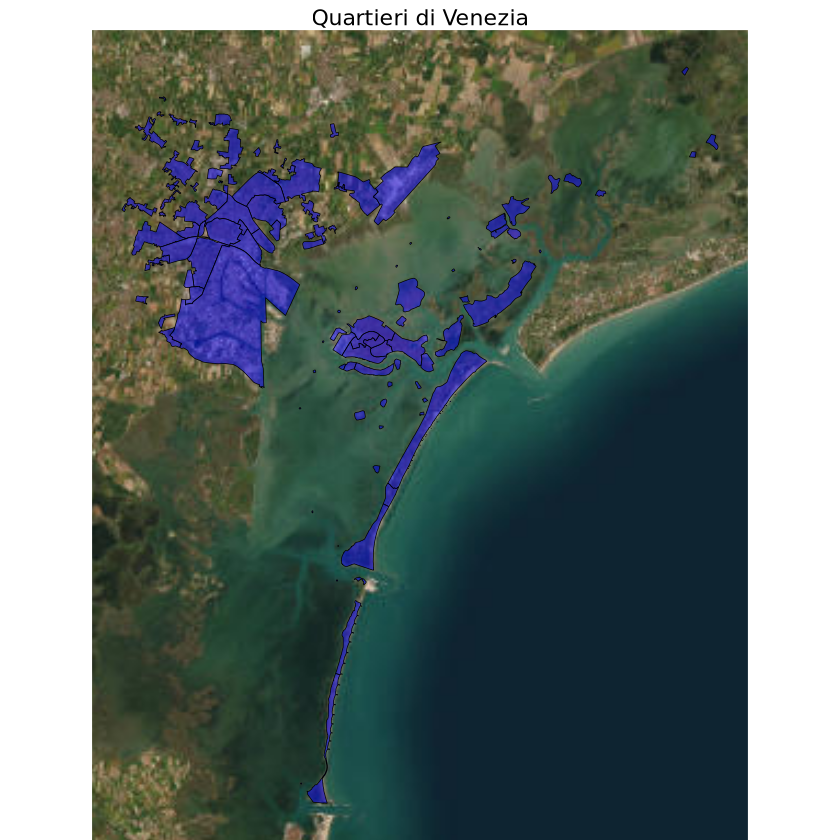

In [22]:
options(viewer = NULL)
# Creare la mappa con ggplot2
ggplot() +
  annotation_map_tile("https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/${z}/${y}/${x}.jpg") + # Mappa di base Esri
  geom_sf(data = quartieri_venezia_3857, fill = "blue", alpha = 0.5, color = "black") + # Quartieri
  theme_void() + # Rimuovere assi
  ggtitle("Quartieri di Venezia") +
  theme(plot.title = element_text(hjust = 0.5))

Zoom: 10



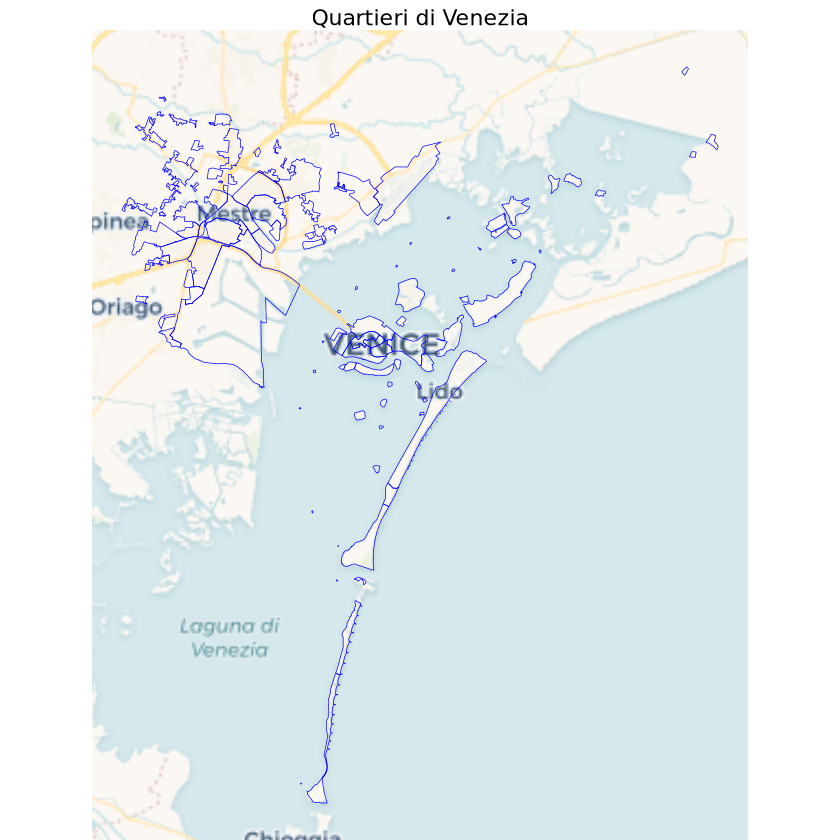

In [23]:
options(viewer = NULL)

# Creare la mappa con ggplot2
ggplot() +
  annotation_map_tile("https://cartodb-basemaps-a.global.ssl.fastly.net/rastertiles/voyager/${z}/${x}/${y}.png") + # Mappa di base CartoDB Voyager
  geom_sf(data = quartieri_venezia_3857, fill = NA, alpha = 0.7, color = "blue") + # Poligoni trasparenti con contorni blu
  theme_void() + # Rimuovere assi
  ggtitle("Quartieri di Venezia") +
  theme(plot.title = element_text(hjust = 0.5))

# Mappe coropletiche

Le mappe coropletiche svolgono un ruolo di primo piano nella data scienze geospaziale poiché ci consentono di visualizzare attributi o variabili non geografici su una mappa geografica.<br/>La parola coropleta deriva dalla radice "choro", che significa "regione". Poiché tali mappe coropletiche rappresentano dati a livello di regione e sono appropriate per dati di unità areali in cui ciascuna osservazione combina il valore di un attributo e una figura geometrica, solitamente un poligono.

fonte [Rey, S.J., D. Arribas-Bel e L.J. Wolf (2020) "Geographic Data Science with PySAL and the PyData Stack”](https://geographicdata.science/book/notebooks/05_choropleth.html)

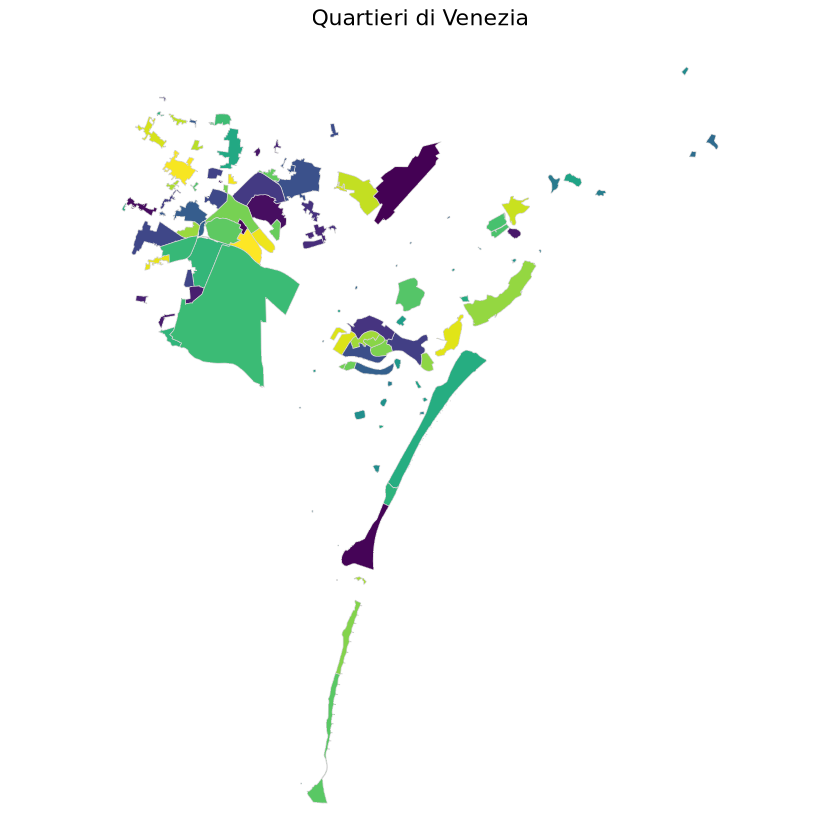

In [24]:
ggplot(data = quartieri_venezia) +
  geom_sf(aes(fill = as.factor(neighbourhood)), color = "lightgray") + # Poligoni colorati per quartiere
  scale_fill_viridis_d(name = "Quartieri")+ 
  theme_void() + # Rimuovere assi
  ggtitle("Quartieri di Venezia") +
  theme(
    plot.title = element_text(hjust = 0.5), # Titolo centrato
    legend.position = "none" # Rimuove la legenda
  )

In [25]:
ggsave("mappa_coropletica.png", width = 10, height = 7, dpi = 300)


In [26]:
# Creare un oggetto solo con la legenda
legenda <- ggplot(data = quartieri_venezia) +
  geom_sf(aes(fill = as.factor(neighbourhood)), color = "lightgray") + # Usare gli stessi colori
  scale_fill_viridis_d(name = "Quartieri") + # Gradiente discreto per i quartieri
  theme_void() + # Rimuovere elementi extra
  theme(
    legend.position = "bottom", # Posizionare la legenda sotto
    legend.key.width = unit(1, "cm"), # Larghezza delle chiavi
    legend.title = element_text(hjust = 0.5) # Centrare il titolo della legenda
  )


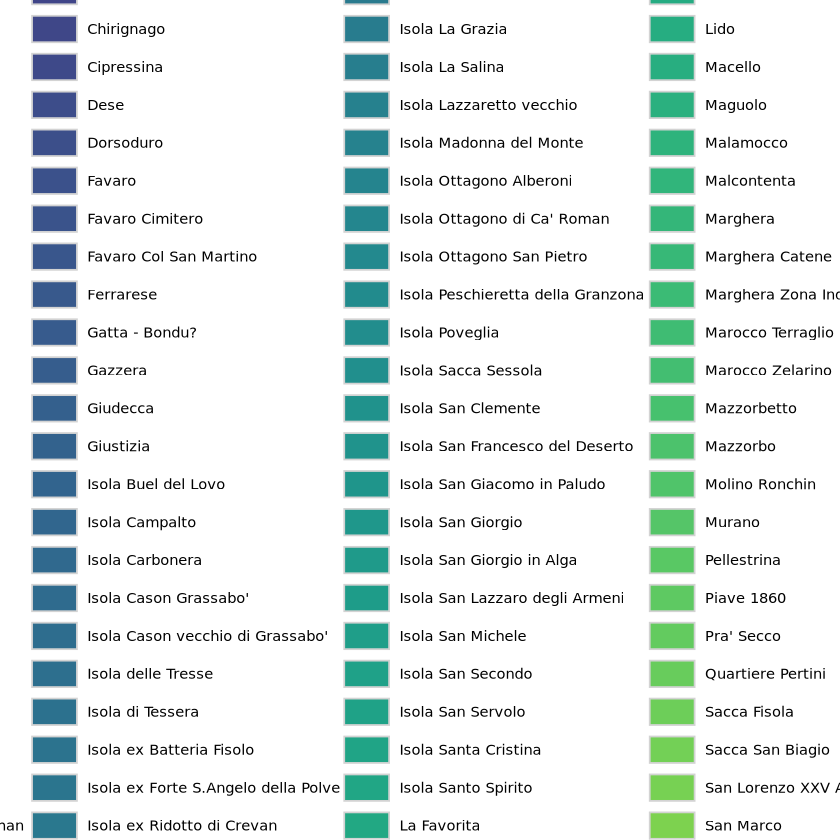

In [27]:
legenda

In [28]:
ggsave("mappa_coropletica_legenda.png", width = 10, height = 7, dpi = 300)


In [29]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [30]:
# Spatial join tra punti e poligoni
join <- st_join(geo_airbnb_venezia, quartieri_venezia, join = st_within)

# Conta i punti per ciascun poligono
totale_strutture <- join %>%
  group_by(neighbourhood) %>%
  summarise(totale_strutture = n()) %>%
  ungroup()

# Visualizza il risultato
print(totale_strutture)

ERROR: Error in wk_handle.wk_wkb(wkb, s2_geography_writer(oriented = oriented, : Loop 0 is not valid: Edge 143 is degenerate (duplicate vertex)


In [ ]:
# Correggere geometrie invalide nei poligoni
quartieri_venezia <- st_make_valid(quartieri_venezia)

# Correggere geometrie invalide nei punti (se necessario)
# geo_airbnb_venezia <- st_make_valid(geo_airbnb_venezia)

# Riprova il join spaziale
join <- st_join(geo_airbnb_venezia, quartieri_venezia, join = st_within)


In [ ]:
totale_strutture <- join %>%
  group_by(neighbourhood.x) %>%
  summarise(totale_strutture = n()) %>%
  ungroup()

In [ ]:
# Ordinare totale_strutture in ordine decrescente
totale_strutture_sorted <- totale_strutture %>%
  arrange(desc(totale_strutture))

In [ ]:
head(totale_strutture_sorted,4)

In [ ]:
library(tidyr)

In [ ]:
# Rinomina la colonna di totale_strutture
totale_strutture <- totale_strutture %>%
  rename(neighbourhood = neighbourhood.x)

In [ ]:
# Effettua il join
quartieri_venezia <- quartieri_venezia %>%
  left_join(st_drop_geometry(totale_strutture), by = "neighbourhood") %>%
  mutate(totale_strutture = replace_na(totale_strutture, 0))


In [ ]:
quartieri_con_strutture <- quartieri_venezia %>%
  filter(totale_strutture > 0)

In [ ]:
quartieri_con_strutture